# Practicals for lecture 1.3

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/practicals/Practicals_1.3.ipynb)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### 1.3.0

In [15]:
# Create a dataframe from the following info about subject in an experiment:
np.random.seed(42)
n_subjects = 100
subjects_data_dictionary = {
    'age': np.random.randint(20, 40, n_subjects),
    'weight': np.random.randint(50, 100, n_subjects),
    'height': np.random.randint(150, 200, n_subjects),
    'sex': np.random.choice(['M', 'F'], n_subjects),
    'handedness': np.random.choice(['R', 'L'], n_subjects),
    'group': np.random.choice(['control', 'patient'], n_subjects)}

subject_data_df = pd.DataFrame(subjects_data_dictionary)
subject_data_df.head()

,age,weight,height,sex,handedness,group
0,26,84,175,M,L,patient
1,39,93,181,M,R,patient
2,34,89,155,F,L,patient
3,30,71,181,M,R,patient
4,27,76,153,F,L,control


In [16]:
# We can calculate the BMI as :
# (body weight in kgs) /  ( (height in meters) ** 2) 

# Define a new column where you compute the BMI for every subject:
subject_data_df["height_m"] = subject_data_df["height"] / 100
subject_data_df["BMI"] = subject_data_df["weight"] /  (subject_data_df["height_m"] ** 2)
subject_data_df.head()

,age,weight,height,sex,handedness,group,height_m,BMI
0,26,84,175,M,L,patient,1.75,27.428571
1,39,93,181,M,R,patient,1.81,28.387412
2,34,89,155,F,L,patient,1.55,37.044745
3,30,71,181,M,R,patient,1.81,21.672110
4,27,76,153,F,L,control,1.53,32.466145


In [17]:
string_data = ['cabbage', 'artichoke', 'banana', 'avocado', 'apple', 'orange']
int_data = [1, 2, 3, 4, 5, 6]
float_data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# organize the data above in a dictionary and from it define a new DataFrame:
data_dict = {"string_data": string_data,
                         "int_data": int_data,
                         "float_data": float_data}
dummy_df = pd.DataFrame(data_dict)
dummy_df.head()

,string_data,int_data,float_data
0,cabbage,1,0.1
1,artichoke,2,0.2
2,banana,3,0.3
3,avocado,4,0.4
4,apple,5,0.5


In [14]:
# Now, reorganize the data in a list of dictionaries 
# (one for every row) and from it define a new DataFrame:
list_of_dicts = [{"string_data": string_val, "int_data": int_val, "float_data": float_val} 
     for string_val, int_val, float_val in zip(string_data, int_data, float_data)]

pd.DataFrame(list_of_dicts)


,string_data,int_data,float_data
0,cabbage,1,0.1
1,artichoke,2,0.2
2,banana,3,0.3
3,avocado,4,0.4
4,apple,5,0.5
5,orange,6,0.6


In [24]:
# Extend the subject dataset above adding two subjects for which you have the following info:
# (Hint: start by defining a new dataframe, and then concatenate it)

new_subject1 = {'age': 25,
    'weight': 78,
    'height': 170,
    'sex': "M",
    'handedness': "R",
    'group': "patient"}
new_subject2 = {'age': 35,
    'weight': 65,
    'height': 165,
    'sex': "F",
    'handedness': "R",
    'group': "control"}

# Make sure the new dataset has univoque indexing! 

new_rows = pd.DataFrame([new_subject1, new_subject2])

#pd.concat([subject_data_df, new_rows])
pd.DataFrame([new_subject1])

,age,weight,height,sex,handedness,group
0,25,78,170,M,R,patient


#### 1.3.1 Methods of `pandas` dataframes

In [27]:
# Here we create a fake dataframe containing the results of a psychological test with 30 subjects.
# Subjects can be left-handed or right-handed.
# The test has 2 measures (reaction time - RT, and accuracy)
def create_data_df():
    np.random.seed(42)
    subject_ability = np.random.uniform(0, 1, 30)
    return pd.DataFrame({'subject': [f"subject_{i}" for i in range(30)],
                       'handedness': np.random.choice(['left', 'right'], 30),
                       'RT': subject_ability*100 + np.random.uniform(0, 50, 30),
                       'accuracy': subject_ability + np.random.normal(0.8, 0.1, 30)})
df = create_data_df()
df.head()

,subject,handedness,RT,accuracy
0,subject_0,left,70.580126,1.263973
1,subject_1,left,110.656984,1.826214
2,subject_2,left,99.202795,1.511277
3,subject_3,left,87.201362,1.336311
4,subject_4,left,24.844587,0.805203


In [28]:
# sort the dataframe by RT:
df.sort_values(by="RT")

,subject,handedness,RT,accuracy
21,subject_21,right,20.995597,0.933407
13,subject_13,right,23.495276,1.004759
4,subject_4,left,24.844587,0.805203
26,subject_26,right,29.903162,0.946232
14,subject_14,left,34.449013,1.079121
15,subject_15,right,37.774315,1.062964
29,subject_29,right,39.987908,0.920822
23,subject_23,right,40.363717,1.270611
19,subject_19,right,43.169640,0.999190
16,subject_16,right,43.991676,1.253786


In [31]:
# Compute the mean and standard deviation of the RT and accuracy across the dataset:
df["RT"].mean(), df["RT"].std()

(69.11343543308882, 32.384300580972045)

In [36]:
# Use indexing to select the RT of the left-handed subjects, and compute its 90% percentile:
df[df["handedness"] == "left"]

,subject,handedness,RT,accuracy
0,subject_0,left,70.580126,1.263973
1,subject_1,left,110.656984,1.826214
2,subject_2,left,99.202795,1.511277
3,subject_3,left,87.201362,1.336311
4,subject_4,left,24.844587,0.805203
7,subject_7,left,133.592562,1.625138
12,subject_12,left,93.043407,1.528660
14,subject_14,left,34.449013,1.079121
18,subject_18,left,61.032168,1.569175
20,subject_20,left,88.320094,1.371989


In [43]:
# Now use the percentile to select the accuracy for left-handed subjects with RT above the 90% percentile:
threshold = df["accuracy"].quantile(0.9)

selector = (df["accuracy"] > threshold) & (df["handedness"] == "left")

df[selector]

,subject,handedness,RT,accuracy
1,subject_1,left,110.656984,1.826214
7,subject_7,left,133.592562,1.625138


<Axes: xlabel='RT', ylabel='accuracy'>

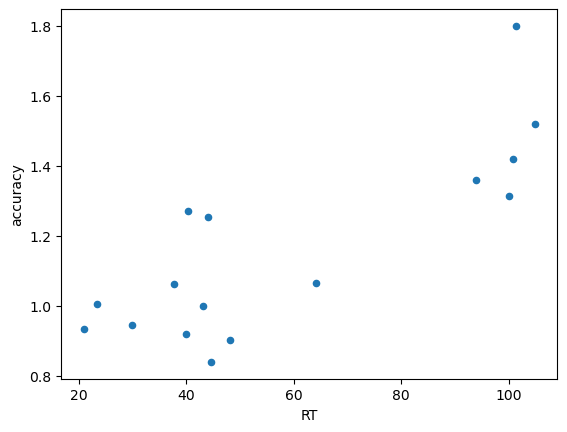

In [45]:
# Create a scatter plot of RT vs accuracy for the right-handed subjects:
df[df["handedness"] == "right"].plot(kind="scatter", x="RT", y="accuracy")


In [46]:
# Take the meteo dataset using the function below
def get_meteo_dataset():
    """Get the meteo dataset from the open-meteo API.
    Note how easy it is to get data from the web with pandas! As long as we give the URL of the csv data, pandas can read it.
    """
    np.random.seed(42)
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m&start_date=2024-04-01&end_date=2024-04-20&format=csv"
    df = pd.read_csv(URL, skiprows=6)  # read the csv file, skipping the first 3 rows (a header)
    df.columns = [col.split(" ")[0] for col in df.columns]  # simplify column names
    df["time"] = pd.to_datetime(df["time"])  # convert the time column to datetime
    df["hour"], df["dayofyear"] = df["time"].dt.hour, df["time"].dt.dayofyear  # extract the hour and day of year
    df["weekdays"] = df["time"].dt.day_name()  # extract the day of the week

    # Here we artificially corrupt some of the data to make it more interesting
    missing_idx = np.random.choice(df.index[:1000], 100)
    df.loc[missing_idx, :] = np.nan
    return df

meteo_df = get_meteo_dataset()

In [47]:
meteo_df 

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,winddirection_10m,hour,dayofyear,weekdays
0,2024-04-01 00:00:00,10.2,97.0,0.0,4.1,38.0,0.0,92.0,Monday
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-04-01 02:00:00,9.6,95.0,0.0,4.0,80.0,2.0,92.0,Monday
3,2024-04-01 03:00:00,9.2,95.0,0.0,5.4,82.0,3.0,92.0,Monday
4,2024-04-01 04:00:00,9.4,94.0,0.0,7.4,67.0,4.0,92.0,Monday
...,...,...,...,...,...,...,...,...,...
475,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,2024-04-20 21:00:00,3.6,73.0,0.0,5.4,90.0,21.0,111.0,Saturday
478,2024-04-20 22:00:00,2.9,79.0,0.0,5.2,106.0,22.0,111.0,Saturday


<Axes: >

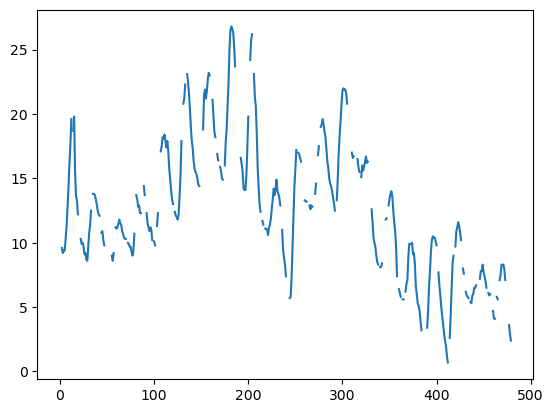

In [49]:
# Plot the temperature and relative humidity for the first 1000 time points. 
# Find points where there's missing data (interrupted line).

meteo_df.loc[:1000, "temperature_2m"].plot()


In [50]:
# Create a new interpolated temperature column by interpolating the temperature column of the dataframe:
meteo_df["interp_temperature"] = meteo_df["temperature_2m"].interpolate()



<Axes: >

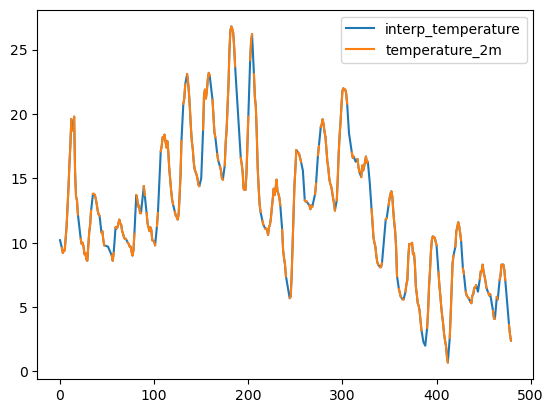

In [52]:
# Make a new plot with the interpolated temperature and the non-interpolated temperature 
# (plot the interpolated first!)
meteo_df[["interp_temperature", "temperature_2m"]].plot()

#### 1.3.2 Organize a dataframe

In [ ]:
# Let's have a look into how to organize data in a dataframe.

# Use the following function that generates results for many subjects on
# an experiment with experimental trials of different difficulty levels.

def get_experiment_block_data(n_subjects=50, difficulty_levels=(1, 2, 3, 4, 5), n_repetitions=50):
    """Generate a dataframe with results from an experiment with experimental blocks.

    Parameters
    ----------
    n_reps : int
        Number of experimental blocks.
    n_subjects : int
        Number of subjects.
    difficulty_levels : tuple
        Difficulty levels of the experimental blocks.

    Returns
    -------
    dict
        A dictionary with the results of the experiment for each subject.


    """


    np.random.seed(42)
    subject_dict = dict()
    for subject in range(n_subjects):
        subject_ability = np.random.randint(1, 6)
        difficulty_level_arr = np.random.choice(difficulty_levels, size=n_repetitions)
        rt = np.random.normal(1000, 100, size=n_repetitions) * difficulty_level_arr / subject_ability
        error = np.random.uniform(0, 1000*difficulty_level_arr / subject_ability, size=n_repetitions)

        subject_dict[f"subject_{subject}"] = dict(
            difficulty_level=difficulty_level_arr,
            rt=rt,
            error=error,
        )

    return subject_dict


# Run the function to generate the data dictionary.
# Every entry of the dictionary (a subject) contains arrays 
# for the trial difficulty level, reaction time, and error:
data = get_experiment_block_data()

# Convert the nested data to a (flat) dataframe:

In [ ]:
# Select the data for subject 0, and create a scatter plot with the reaction time as a function of the trial difficulty level:


In [ ]:
# Load the subjects dataframe from the csv file at the url:
# https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv

subject_df = pd.read_csv("https://raw.githubusercontent.com/vigji/python-cimec/main/practicals/data/subjects_df.csv",
                         index_col=0)
subject_df.head()

In [ ]:
# Now use boolean indexing on the subject dataframe to include only left-handed males 
# above 30 years in the analysis.
# Plot the reaction time as a function of the trial difficulty level for this subpopulation:
